In [1]:
library(igraph) 
library(data.table)
library(readr)



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# Question 6

In [2]:
pwd <- '/Users/px/Desktop/untitledfolder/'
edge_file <- paste(pwd, "edge_list_v2.txt", sep="")
edge_list <- do.call(rbind,strsplit(readLines(edge_file, encoding = 'latin1'),'\t\t',fixed=T))
g <- graph.data.frame(edge_list, directed=FALSE)
E(g)$weight <-as.double(edge_list[,3])

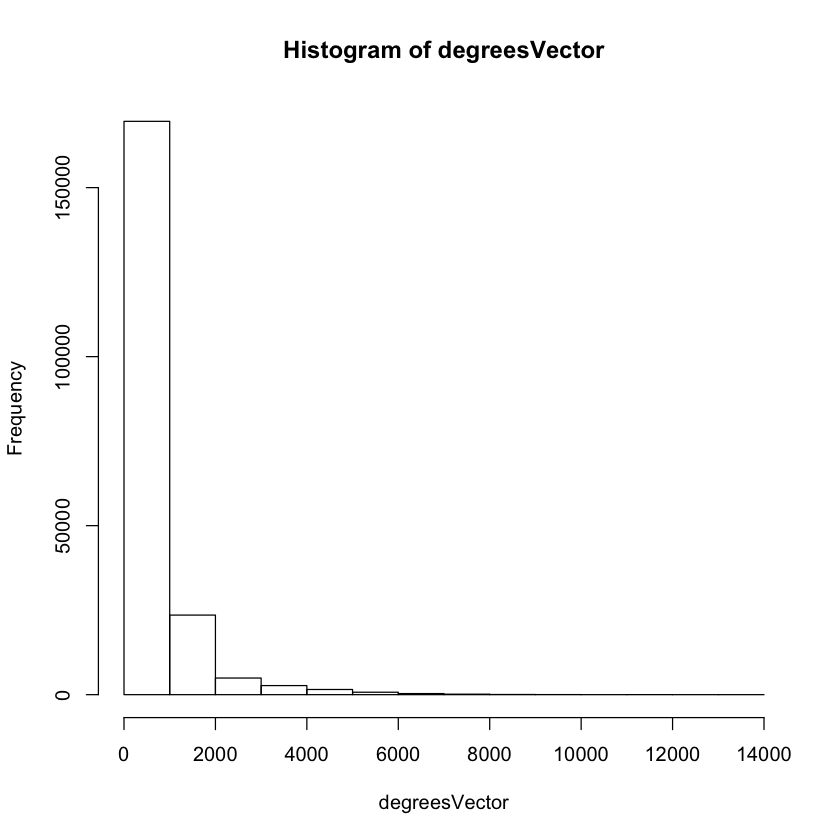

In [3]:
degreesVector <- degree(g)
hist(degreesVector)

# Question 7

In [4]:
g.commu <- fastgreedy.community(g)
# print(g.commu)
# print((g.commu['1':'10']))

In [5]:
setwd("/Users/px/Desktop/Proj_4/1/")
movies.genre = read_delim("movie_genre.txt" , col_names = paste0("c",seq_len(3)), delim = "\t\t", quote = "\"")

Parsed with column specification:
cols(
  c1 = col_character(),
  c2 = col_character(),
  c3 = col_character()
)


In [6]:
g.commu

IGRAPH clustering fast greedy, groups: 31, mod: 0.79
+ groups:
  $`1`
      [1] "Gaiking II (2011)"                                                                                                 
      [2] "Passenger Side (2009)"                                                                                             
      [3] "Conflict of Interest (1993)"                                                                                       
      [4] "Killer Set (2015)"                                                                                                 
      [5] "Schadenfreude (2016)"                                                                                              
      [6] "Stolen (2012)"                                                                                                     
      [7] "Medusa (2015/IV)"                                                                                                  
      [8] "Intrepid (2015/II)"           

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

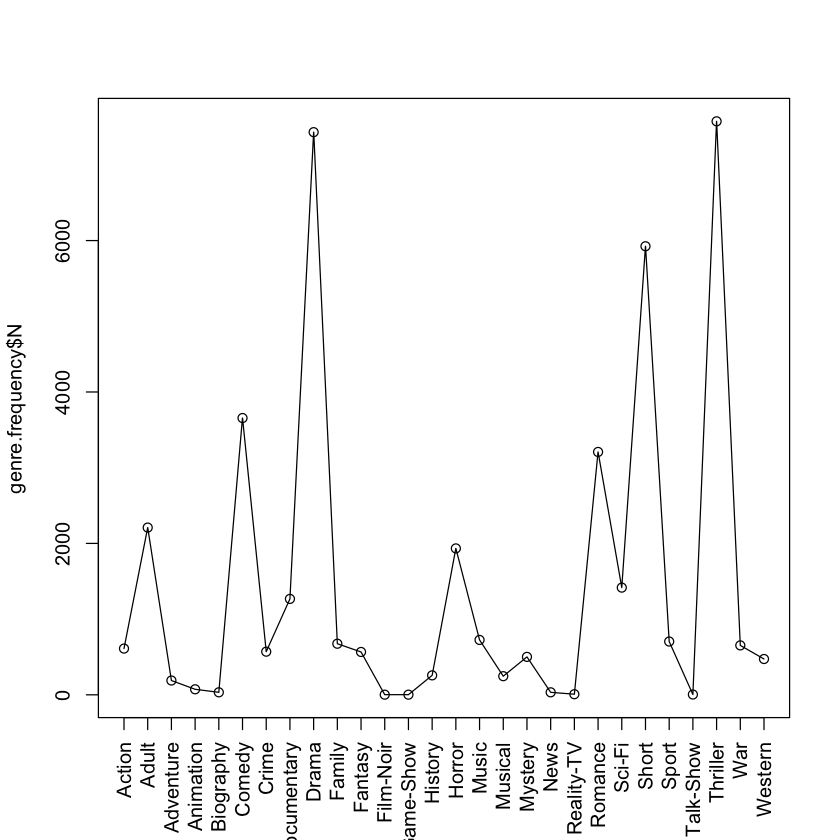

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

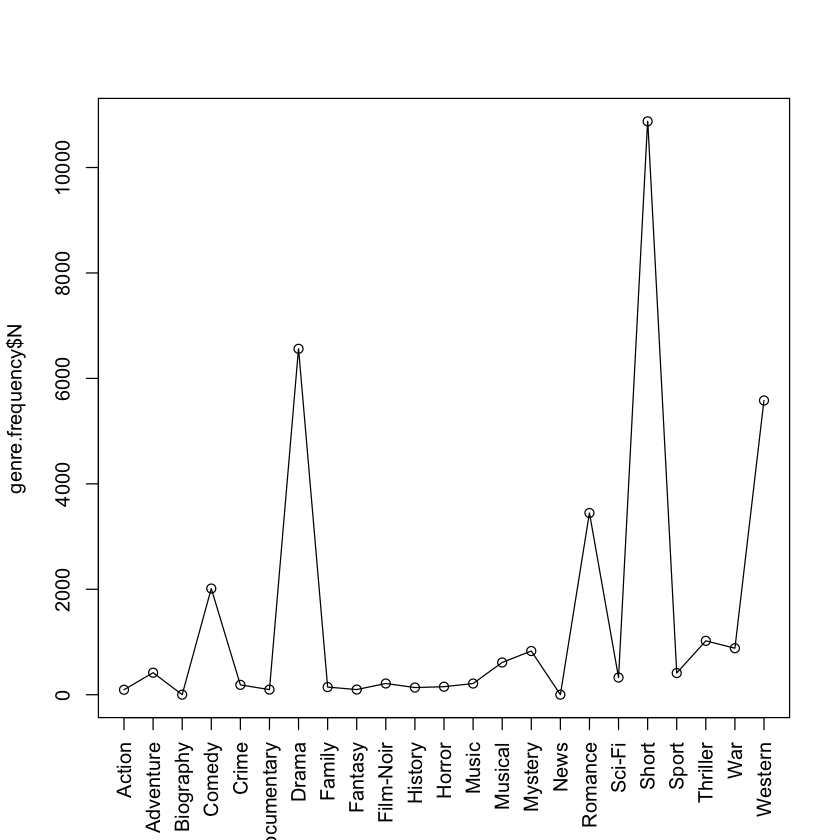

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

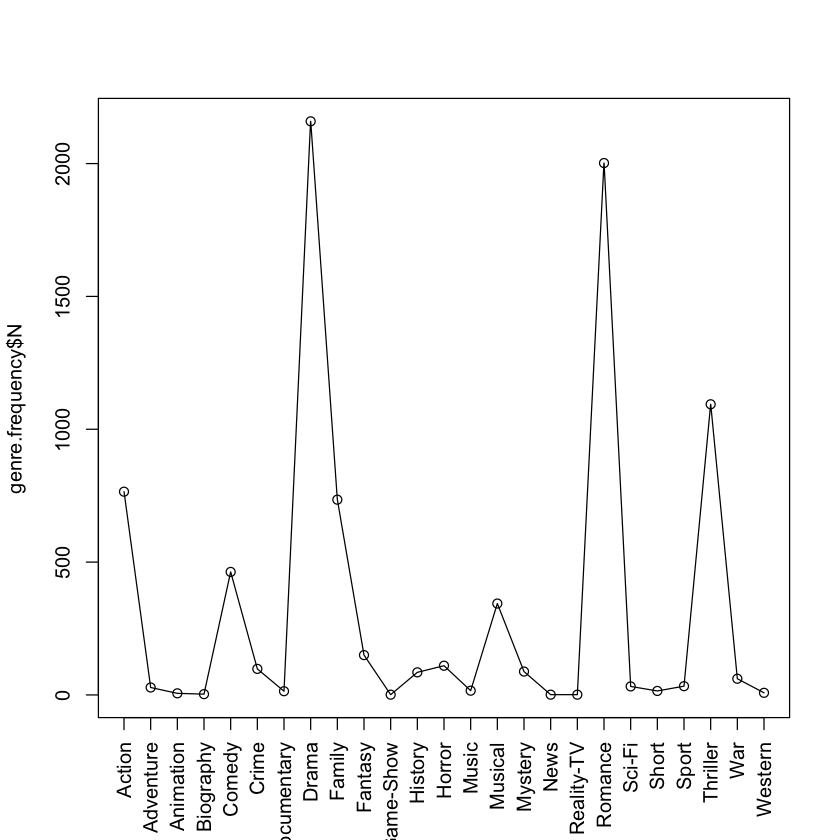

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

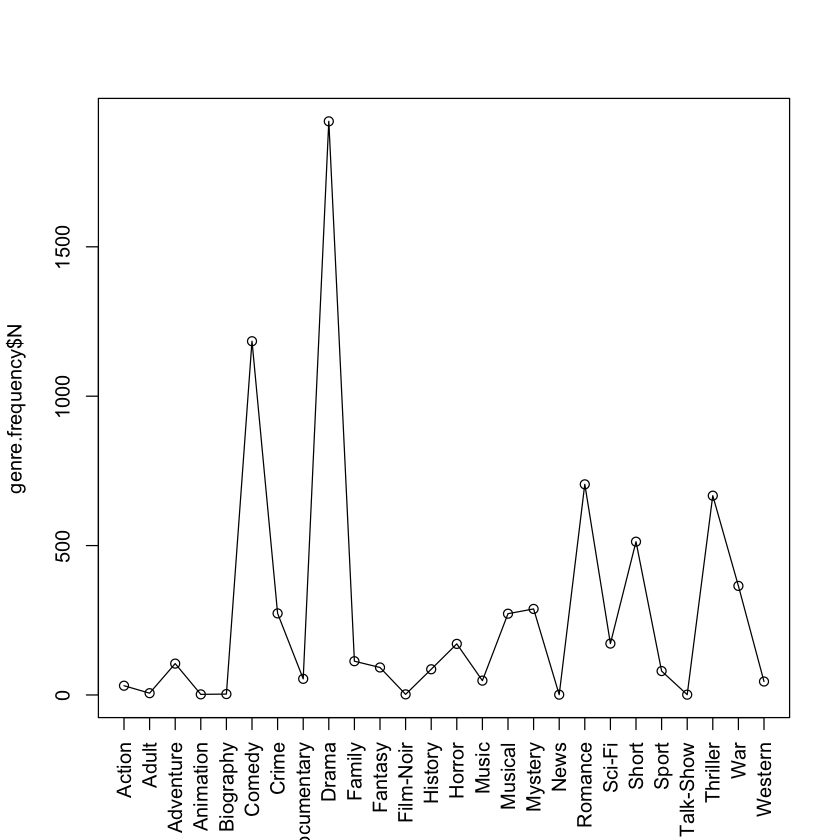

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

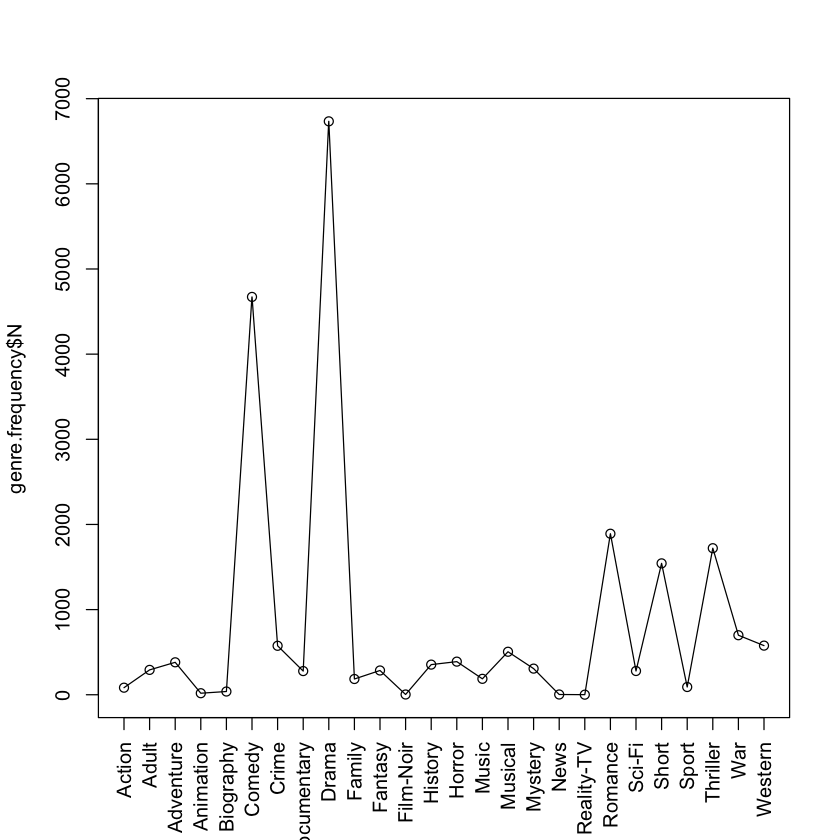

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

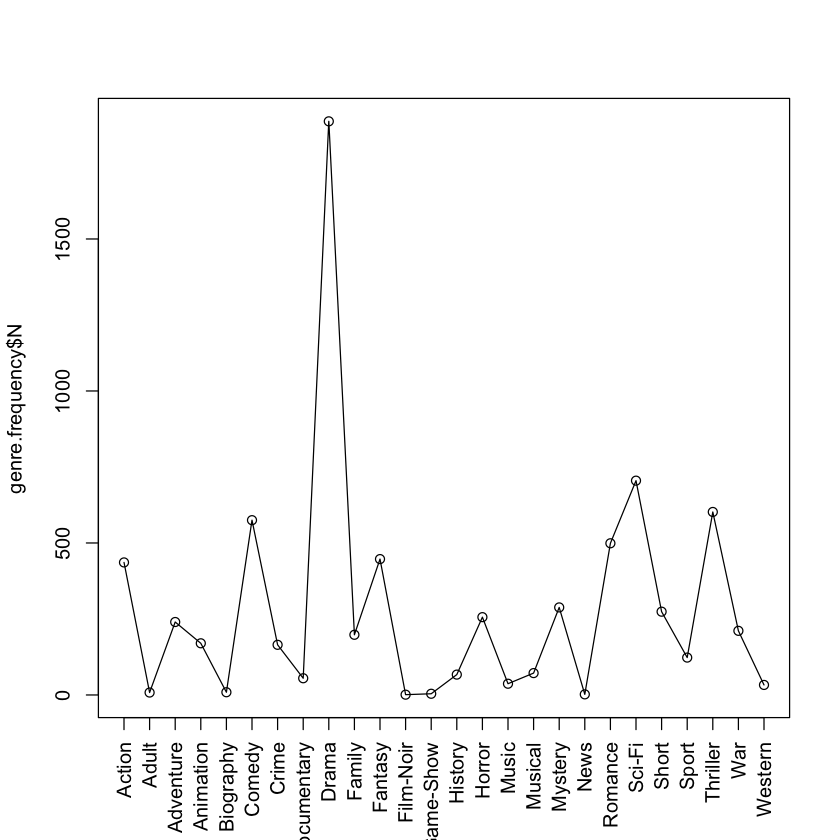

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

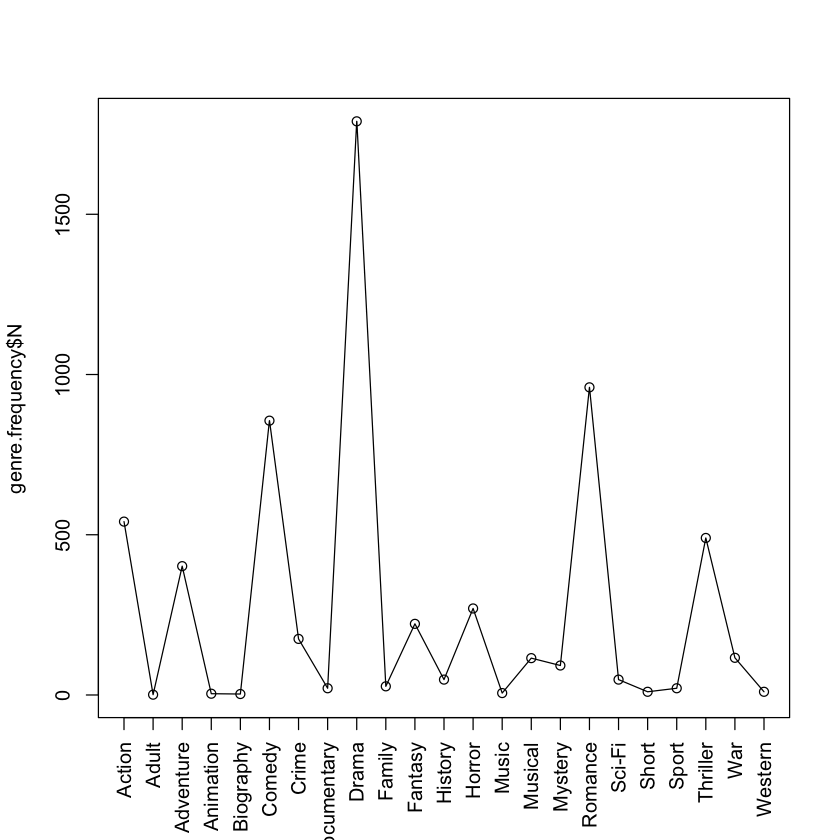

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”Warning message in replayPlot(obj):
“plot type 'o-' will be truncated to first character”

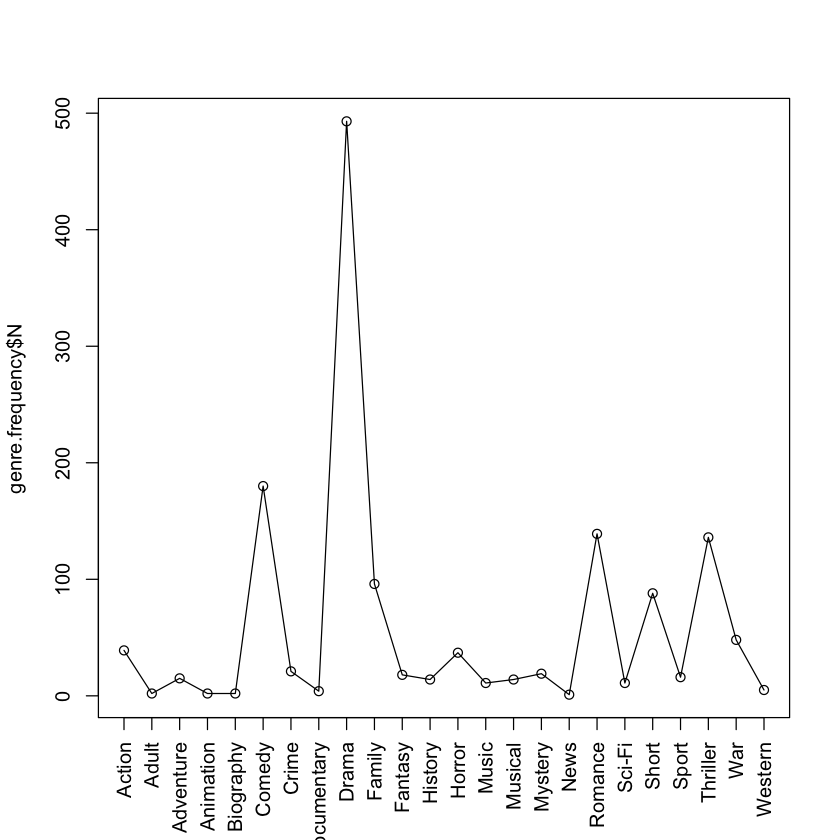

Warning message in plot.xy(xy, type, ...):
“plot type 'o-' will be truncated to first character”

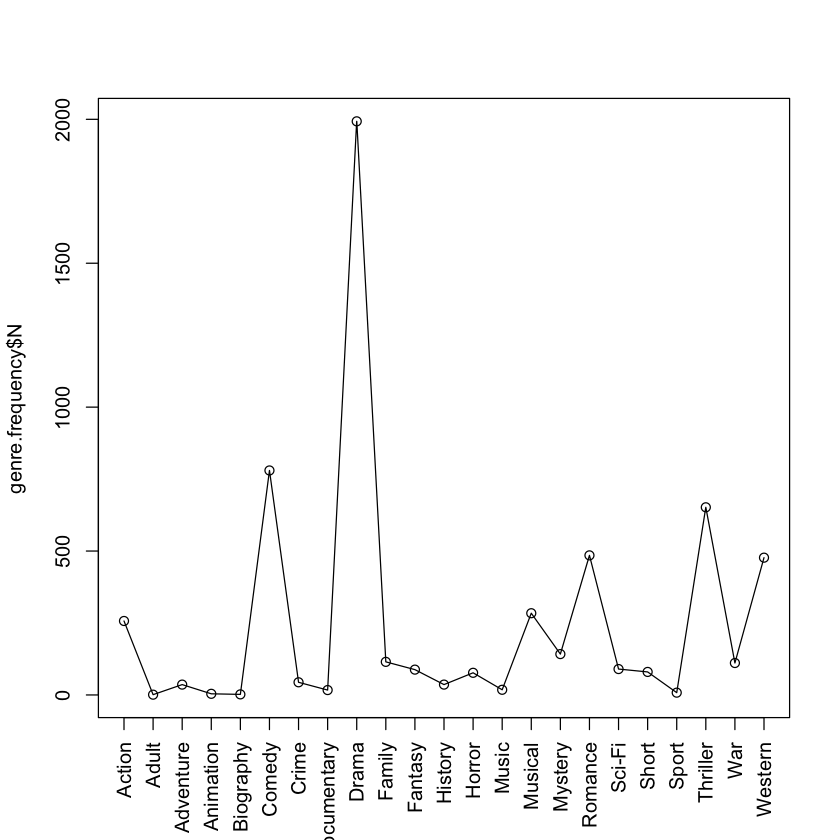

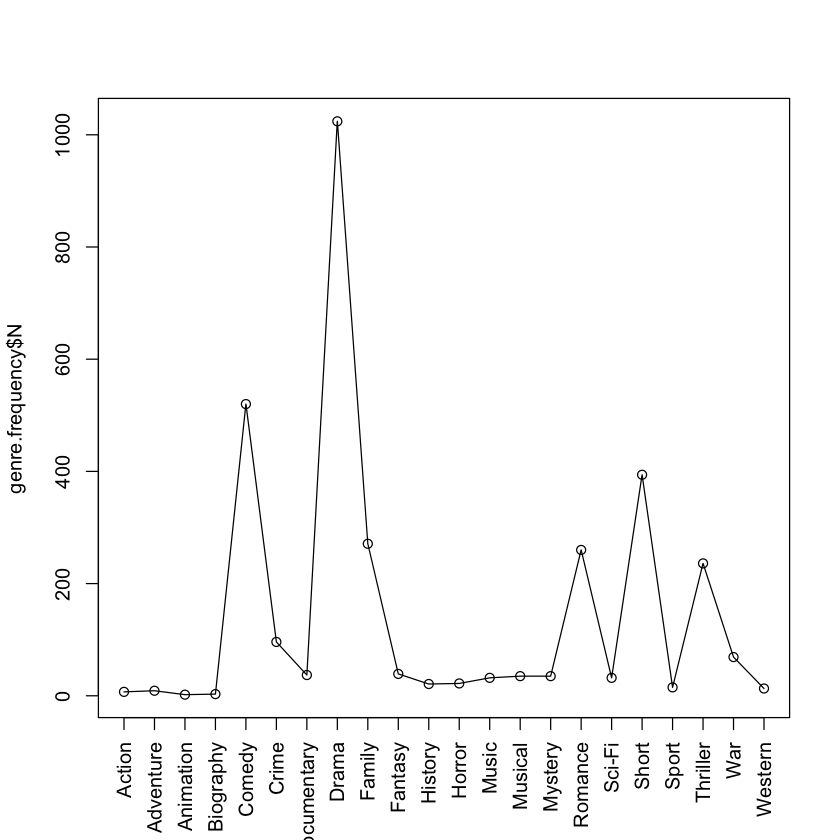

In [11]:
dominant.genre <- c()
for (num in c(1:10)){
    genres <- c()
    for (movie in g.commu[as.character(num)]){
#         print(movie)
#         movie <- id.movie$c3[which(id.movie$c1 %in% movie)]
        movie.genre <- movies.genre$c3[which(movies.genre$c1 %in% movie)]
        genres <- c(genres, movie.genre)
    }
    genre.frequency <- as.data.table(table(genres))
    len <- length(genre.frequency$N)
#     print(len)
#     print(genre.frequency)
    plot(c(1:len),genre.frequency$'N','o-',xlab = "",xaxt="n")
    axis(1,at=c(1:len),labels=c(genre.frequency$'genre'),las=2)
}



# Question 8(a)

In [12]:
dominant.genre <- c()
for (num in c(1:length(g.commu))){
# for (num in c('1')){
    genres <- c()
    for (movie in g.commu[as.character(num)]){
#         movie <- id.movie$c3[which(id.movie$c1 %in% movie)]
        movie.genre <- movies.genre$c3[which(movies.genre$c1 %in% movie)]
        genres <- c(genres, movie.genre)
    }
    genre.frequency <- as.data.table(table(genres))
    dominant.genre <- c(dominant.genre, genre.frequency$'genres'[which.max(genre.frequency$'N')])  
}
print(dominant.genre)

 [1] "Thriller" "Short"    "Drama"    "Drama"    "Drama"    "Drama"   
 [7] "Drama"    "Drama"    "Drama"    "Drama"    "Drama"    "Drama"   
[13] "Drama"    "Drama"    "Drama"    "Short"    "Drama"    "Drama"   
[19] "Drama"    "Romance"  "Drama"    "Drama"    "Thriller" "Drama"   
[25] "Short"    "Adult"    "Short"    "Musical"  "Short"    "Drama"   
[31] "Drama"   


In [17]:
as.data.table(table(dominant.genre))

dominant.genre,N
Adult,1
Drama,21
Musical,1
Romance,1
Short,5
Thriller,2


# Question 8(b)

In [13]:
genre.fraction <- as.data.table(table(movies.genre[3]))
fraction <- genre.fraction$N/sum(genre.fraction$N)
genre.fraction <- cbind(genre.fraction[,1:ncol(genre.fraction)],fraction)
print(genre.fraction)


             V1      N     fraction
 1:      Action  12361 1.222662e-02
 2:       Adult  63214 6.252677e-02
 3:   Adventure   6872 6.797291e-03
 4:   Animation   3362 3.325450e-03
 5:   Biography   1789 1.769551e-03
 6:      Comedy  49712 4.917156e-02
 7:       Crime   6676 6.603422e-03
 8: Documentary  79672 7.880584e-02
 9:       Drama 109525 1.083343e-01
10:     Erotica      1 9.891285e-07
11:      Family  13421 1.327509e-02
12:     Fantasy   7472 7.390768e-03
13:   Film-Noir    224 2.215648e-04
14:   Game-Show    480 4.747817e-04
15:     History   7460 7.378899e-03
16:      Horror  13630 1.348182e-02
17:       Music  20418 2.019603e-02
18:     Musical   8334 8.243397e-03
19:     Mystery   7130 7.052486e-03
20:        News   3277 3.241374e-03
21:  Reality-TV   2741 2.711201e-03
22:     Romance  31267 3.092708e-02
23:      Sci-Fi  11007 1.088734e-02
24:       Short 448733 4.438546e-01
25:       Sport  16905 1.672122e-02
26:   Talk-Show   1563 1.546008e-03
27:    Thriller  55458 5.485

In [14]:
dominant.genre.2 <- c()
for (num in c(1:length(g.commu))){
# for (num in c(1)){
    genres <- c()
    for (movie in g.commu[as.character(num)]){
#         movie <- id.movie$c3[which(id.movie$c1 %in% movie)]
        movie.genre <- movies.genre$c3[which(movies.genre$c1 %in% movie)]
        genres <- c(genres, movie.genre)
    }
    genre.frequency <- as.data.table(table(genres))
    
    modified_scores <- c()
    for (genre in genre.frequency$genres){
        ci <- genre.frequency$N[which(genre.frequency$genres == genre)]
        pi <- ci/(length(genres))
        qi <- genre.fraction$fraction[which(genre.fraction$V1 == genre)]
        modified_score <- log(ci)*pi/qi
        modified_scores <- c(modified_scores, modified_score)
    }
    
    genre.frequency <- cbind(genre.frequency[,1:ncol(genre.frequency)],modified_scores)
#     print(genre.frequency)
    dominant.genre.2 <- c(dominant.genre.2, genre.frequency$'genres'[which.max(genre.frequency$'N')])
}
print(dominant.genre.2)



 [1] "Thriller" "Short"    "Drama"    "Drama"    "Drama"    "Drama"   
 [7] "Drama"    "Drama"    "Drama"    "Drama"    "Drama"    "Drama"   
[13] "Drama"    "Drama"    "Drama"    "Short"    "Drama"    "Drama"   
[19] "Drama"    "Romance"  "Drama"    "Drama"    "Thriller" "Drama"   
[25] "Short"    "Adult"    "Short"    "Musical"  "Short"    "Drama"   
[31] "Drama"   


In [18]:
as.data.table(table(dominant.genre.2))

dominant.genre.2,N
Adult,1
Drama,21
Musical,1
Romance,1
Short,5
Thriller,2


# Question 8(c)

In [15]:
movie_performer_file <- paste(pwd, "movie_performer.txt", sep="")
movie_performer <- do.call(rbind,strsplit(readLines(movie_performer_file, encoding = 'latin1'),'\t\t',fixed=T))


Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

In [22]:
size10_20 <- 0
for (num in c(1:length(g.commu))){
# for (num in c(1:1)){
    size <- lengths(g.commu[as.character(num)])
#     print(size)
    if (size<=20 & size>=10){
        size10_20 <- num
    }
}
print(size10_20)
print(size)
movie.names <- g.commu[as.character(size10_20[1])]
# print(movie_id.s)
# print(movie.names)
# Encoding <- (movie.names, "latin1")
# print(movie.names)

[1] 27
31 
75 


In [23]:
create_bi <- function(nodesSet1,nodesSet2, edgeList){
    gr <- graph.empty(direct=F)
    gr <- add.vertices(gr,nv=length(nodesSet1),attr=list(name=nodesSet1, type=rep(TRUE,length(nodesSet1))))
    gr <- add.vertices(gr,nv=length(nodesSet2),attr=list(name=nodesSet2, type=rep(FALSE,length(nodesSet2))))
    edgeListVec <- as.vector(t(as.matrix(data.frame(S1=edgeList$n1, S2=edgeList$n2))))
    gr <- add.edges(gr,edgeListVec)
    gr
}


In [42]:
bipartite.vertex <- movie_performer[which(movie_performer[,1] %in% movie.names[[1]]),]
n1 <- c()
n2 <- c()
no1 <- c()
no2 <- c()
for(i in 1:length(bipartite.vertex[,1])){
#     print(length(unique(bipartite.vertex[i,])))
    n1 <- c(n1, rep(bipartite.vertex[i,1], length = length(unique(bipartite.vertex[i,]))-1))
    n2 <- c(n2, unique(bipartite.vertex[i,])[2:length(unique(bipartite.vertex[i,]))])
    no1 <- c(no1, bipartite.vertex[i,1])
    no2 <- c(no2, unique(bipartite.vertex[i,])[2:length(unique(bipartite.vertex[i,]))])
#     print(no2)
}
no2 <- unique(no2)
el <- data.frame(n1, n2)


In [43]:
bipartite.vertex

Unconditional Love (2010),"Dasz, Steven","Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Chan, Juju",⋯,"Sandison, Martin","Taylor, Stuart (X)","Chan, Juju","Kilpatrick, Kayleigh","Marshall, Scarlett","McKay, Hannah",Unconditional Love (2010),"Dasz, Steven","Joiner, Craig","McKay, Reuben"
Booze Culture (2012),"Hislop, Tom","McKay, Reuben","Noble, John-William","Kilpatrick, Kayleigh","McKay, Hannah",Booze Culture (2012),"Hislop, Tom","McKay, Reuben","Noble, John-William",⋯,"McKay, Reuben","Noble, John-William","Kilpatrick, Kayleigh","McKay, Hannah",Booze Culture (2012),"Hislop, Tom","McKay, Reuben","Noble, John-William","Kilpatrick, Kayleigh","McKay, Hannah"
Boycie (2011),"Hislop, Tom","Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","McKay, Hannah",⋯,"Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","McKay, Hannah","Simpson, Julia (II)",Boycie (2011)
Call of Babylon (2012),"Hislop, Tom","Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh",⋯,"Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah",Call of Babylon (2012)
Inner Joy of a Broken Heart (2011),"Hislop, Tom","McKay, Reuben","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",Inner Joy of a Broken Heart (2011),"Hislop, Tom","McKay, Reuben",⋯,"Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",Inner Joy of a Broken Heart (2011),"Hislop, Tom","McKay, Reuben","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah"
Is This It? (2012),"Hislop, Tom","Joiner, Craig","McKay, Reuben","Noble, Graeme","Noble, John-William","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",⋯,"Joiner, Craig","McKay, Reuben","Noble, Graeme","Noble, John-William","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",Is This It? (2012),"Hislop, Tom"
Life of a Spy (2012),"Hislop, Tom","McKay, Reuben","Noble, John-William","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah",Life of a Spy (2012),"Hislop, Tom","McKay, Reuben",⋯,"Noble, John-William","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah",Life of a Spy (2012),"Hislop, Tom","McKay, Reuben","Noble, John-William","Taylor, Stuart (X)","Kilpatrick, Kayleigh"
Losers in Love (2011),"Hislop, Tom","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah",⋯,"McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",Losers in Love (2011)
Street Fight (2012),"Hislop, Tom","Joiner, Craig","McKay, Reuben","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah",⋯,"Joiner, Craig","McKay, Reuben","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",Street Fight (2012)
The Shadow of Death (2011),"Hislop, Tom","Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)","Kilpatrick, Kayleigh",⋯,"Taylor, Stuart (X)","Kilpatrick, Kayleigh","McKay, Hannah","Simpson, Julia (II)",The Shadow of Death (2011),"Hislop, Tom","Joiner, Craig","McKay, Reuben","Moir, Shaun","Noble, Graeme"
A Schoolboy Error Production (2009),"Joiner, Craig","McKay, Reuben","Noble, Graeme","Noble, John-William","Sandison, Martin","Taylor, Stuart (X)",A Schoolboy Error Production (2009),"Joiner, Craig","McKay, Reuben",⋯,"Noble, Graeme","No

[1] TRUE

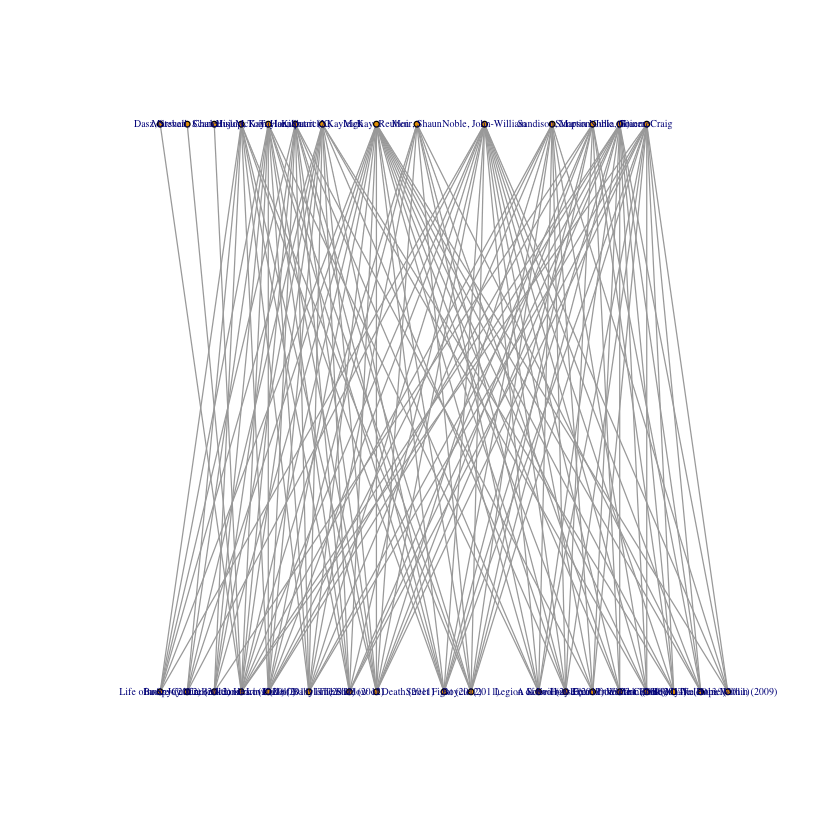

In [44]:
g.bi <- create_bi(no1,no2,el)
is.bipartite(g.bi)
plot(g.bi,layout=layout.bipartite,vertex.size=2,vertex.label.cex=0.5)

In [46]:
actor.degree <- sort(degree(g.bi)[no2], decreasing=T)
print(actor.degree)

dominant.genre.2[size10_20]
print(actor.degree[1:3])

       McKay, Reuben  Noble, John-William        Noble, Graeme 
                  18                   17                   14 
       Joiner, Craig Kilpatrick, Kayleigh     Sandison, Martin 
                  13                   12                   11 
  Taylor, Stuart (X)        McKay, Hannah  Simpson, Julia (II) 
                  11                   11                   10 
         Moir, Shaun          Hislop, Tom         Dasz, Steven 
                   9                    9                    1 
          Chan, Juju   Marshall, Scarlett 
                   1                    1 


[1] "Short"

      McKay, Reuben Noble, John-William       Noble, Graeme 
                 18                  17                  14 


## Question 9

In [52]:
library(data.table)
pwd <- '/Users/px/Desktop/untitledfolder/'
rating_file <- paste(pwd, "movie_rating.txt", sep="")
movie_rating <- fread(rating_file,header = FALSE, sep="\t")

[1] "average of neighbor"
[1] 6.248372
[1] "average of neighbor"
[1] 6.795087


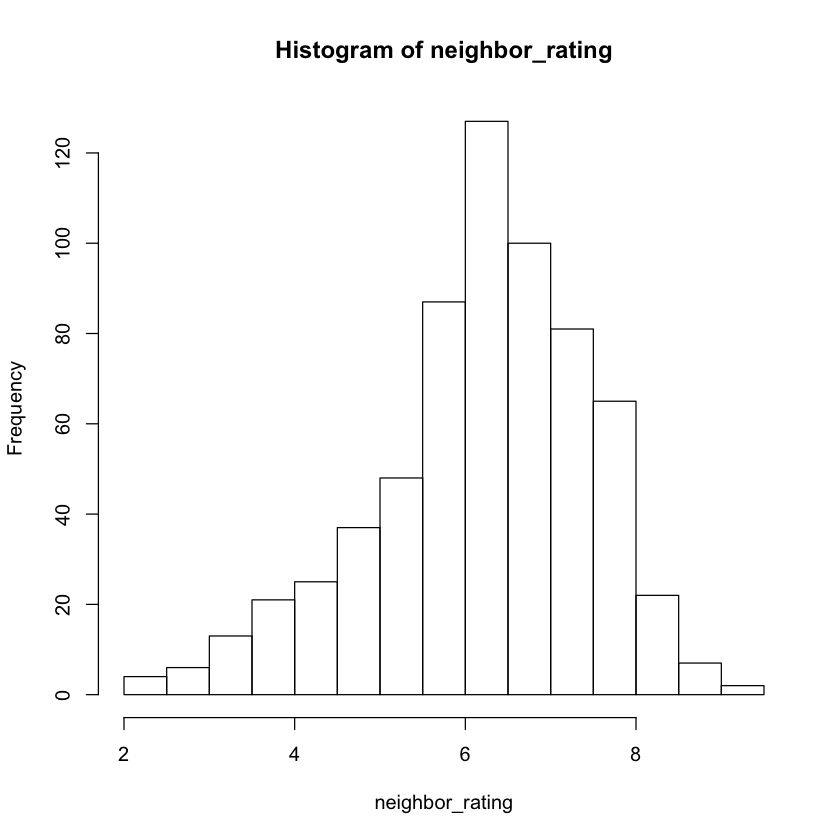

[1] "average of neighbor"
[1] 6.330778


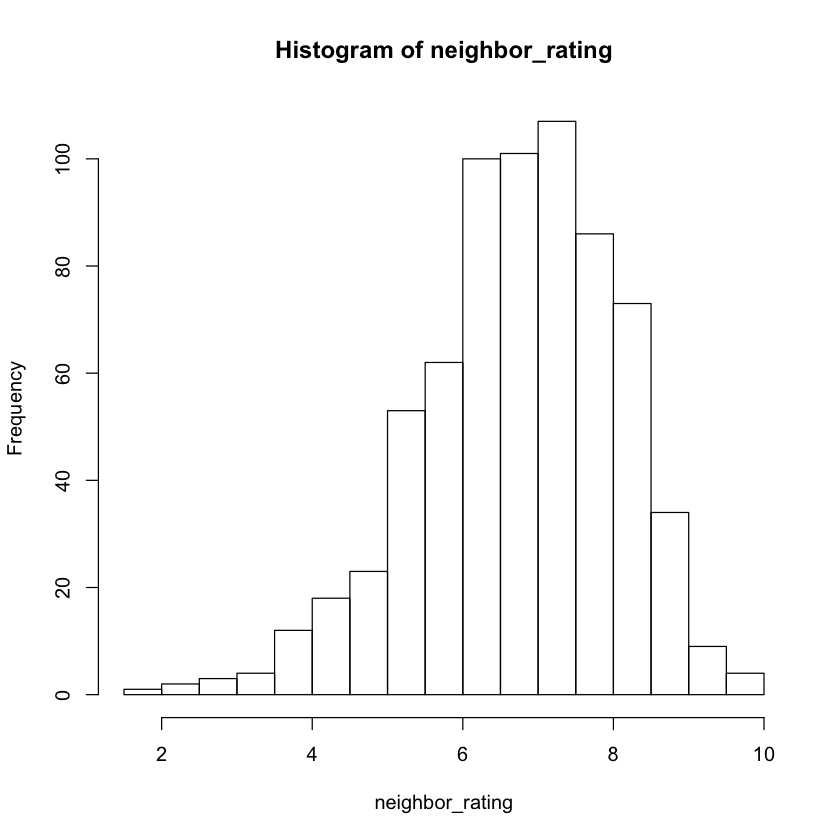

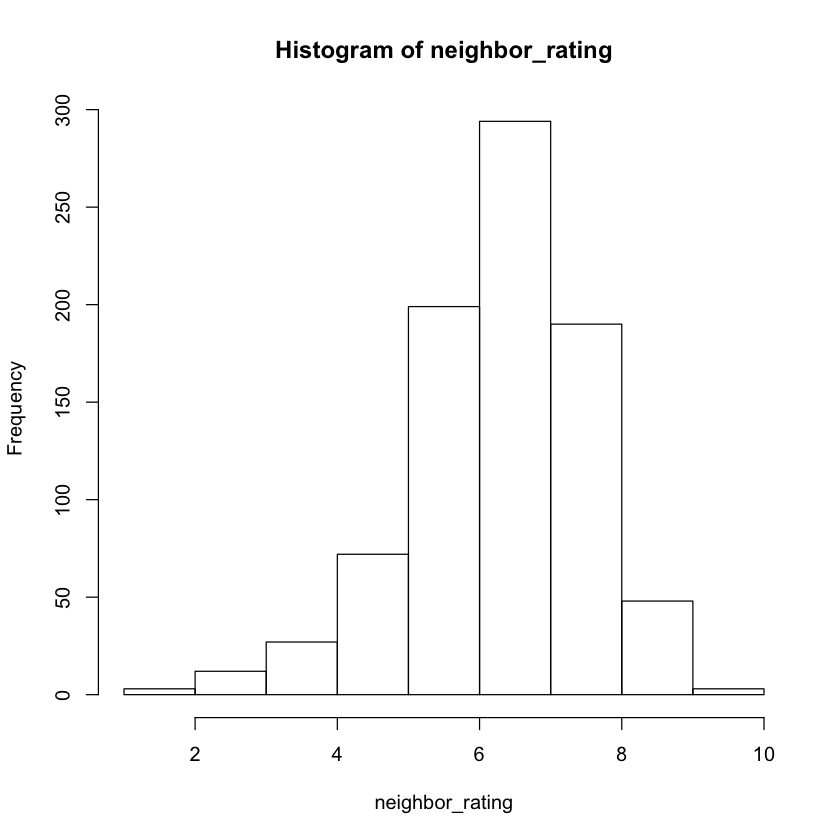

In [53]:
movie_list <- c("Mission: Impossible - Rogue Nation (2015)","Minions (2015)","Batman v Superman: Dawn of Justice (2016)")
# movie_list <- c('Auf der grünen Wiese (1953)')
weight_list = {}
neighbor_list = {}
movie_in_graph <- V(g)$name
prediction <- c()
for(movie in movie_list){
    tmp_ind <- which(movie_in_graph ==  movie)
    neighbor_list <- neighbors(g,tmp_ind)$name
    neighbor_with_rate <- c()
    neighbor_rating <- c()
    for (i in 1:length(neighbor_list)){
        if(neighbor_list[i] %in% movie_rating$V1){     
            neighbor_rating <- c(neighbor_rating,as.double(movie_rating$V3[movie_rating$V1 == neighbor_list[i]]))
            neighbor_with_rate <-c(neighbor_with_rate, neighbor_list[i])
        }
    }
    par(mfrow=c(1,1))
#     print(neighbor_with_rate)
#     print(neighbor_rating)
    print("average of neighbor")
    print(mean(neighbor_rating))
    hist(neighbor_rating)
}

## Question 10

In [54]:
fg_comm <- g.commu
length(fg_comm)

[1] 31

[1] "average of neighbor"
[1] 6.227451
[1] "average of neighbor"
[1] 7.228463


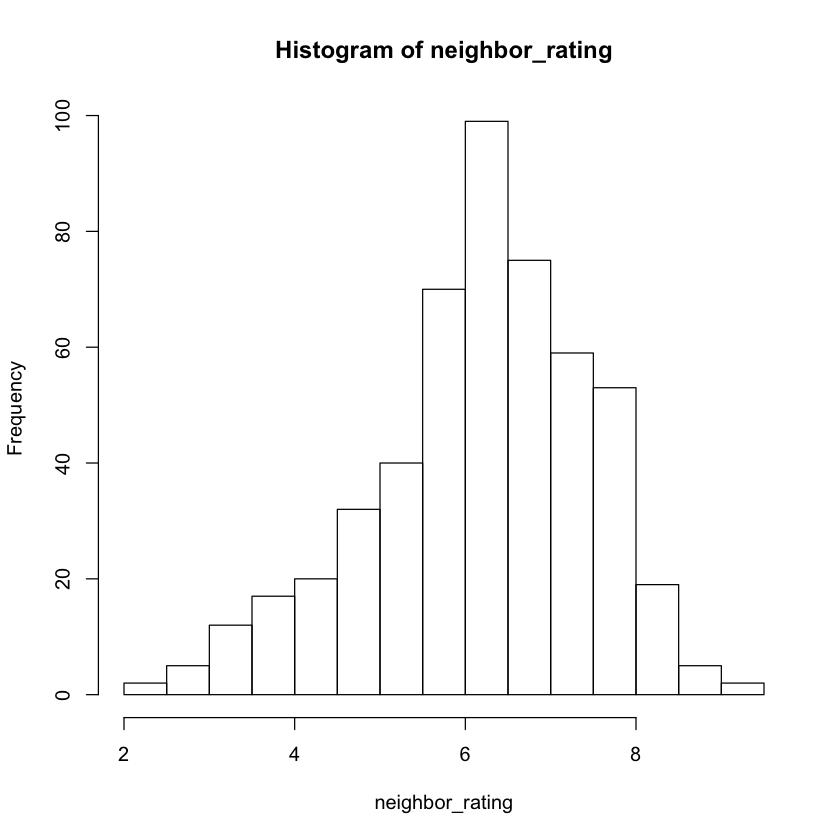

[1] "average of neighbor"
[1] 6.302815


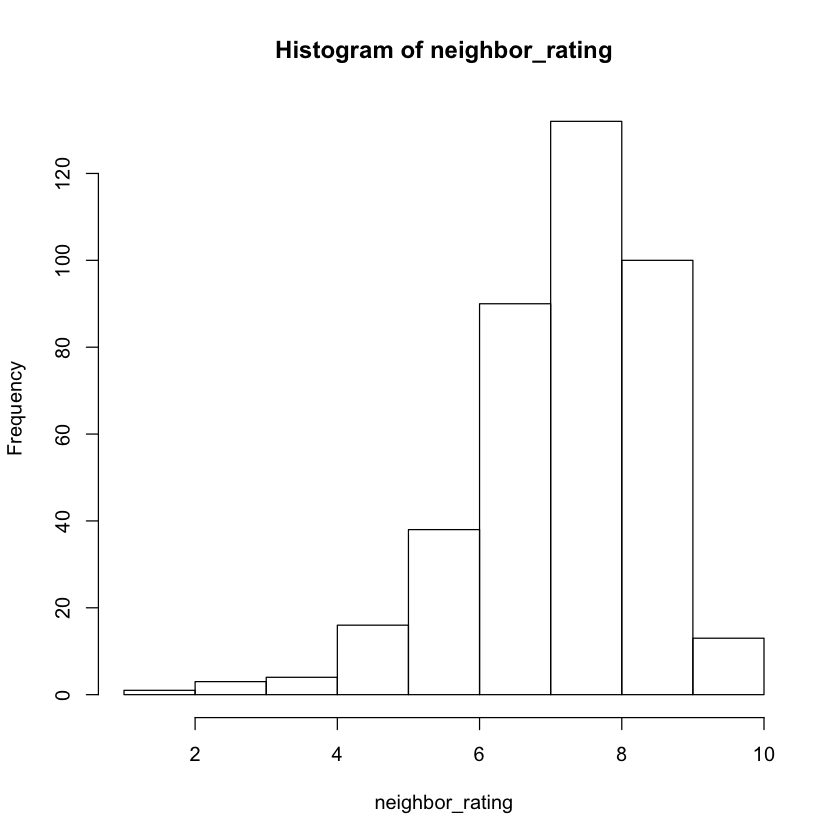

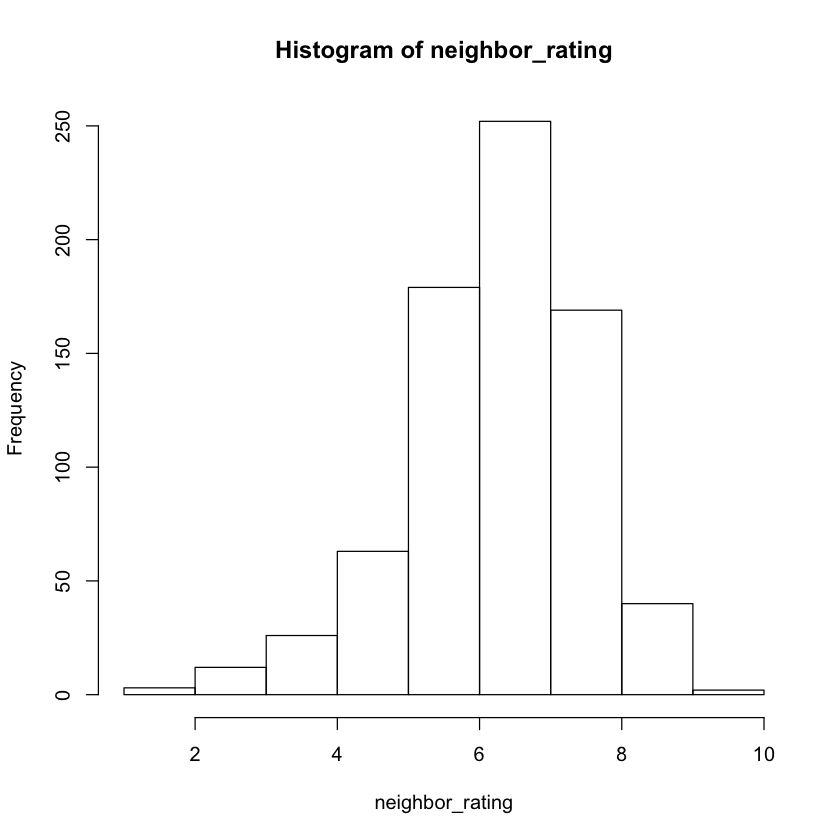

In [55]:
for(movie in movie_list){
    for(i in 1:length(fg_comm)){
        if(movie %in% fg_comm[[i]]){
            restricted_com <- fg_comm[[i]]
        }
    }
#     print(restricted_com)
    tmp_ind <- which(movie_in_graph ==  movie)
    neighbor_list <- neighbors(g,tmp_ind)$name
    neighbor_list <- intersect(restricted_com, neighbor_list)
    neighbor_with_rate <- c()
    neighbor_rating <- c()
    for (i in 1:length(neighbor_list)){
        if(neighbor_list[i] %in% movie_rating$V1){     
            neighbor_rating <- c(neighbor_rating,as.double(movie_rating$V3[movie_rating$V1 == neighbor_list[i]]))
            neighbor_with_rate <-c(neighbor_with_rate, neighbor_list[i])
        }
    }
    par(mfrow=c(1,1))
#     print(neighbor_with_rate)
#     print(neighbor_rating)
    print("average of neighbor")
    print(mean(neighbor_rating))
    hist(neighbor_rating)
}

## Question 11

In [ ]:
for(movie in movie_list){
    tmp_ind <- which(movie_in_graph ==  movie)
    neighbor_list <- neighbors(g,tmp_ind)$name
    print(V(g)[V(g)$name == movie])
    weight_list <- c()
    for(nei in neighbor_list){
        weight_list <- c(weight_list, E(g)[get.edge.ids(g, c(movie, nei))]$weight)
    }
    nei_sort <- sort(weight_list,decreasing=TRUE, index.return=TRUE)
    top_nei <- neighbor_list[nei_sort$ix[1:5]]
    com_idx <- c()
    for(top in top_nei){
        for(i in 1:length(fg_comm)){
            if(top %in% fg_comm[[i]]){
                com_idx <- c(com_idx, i)
            }
        }
    }
#     print(weight_list)
    print(top_nei)
    print(com_idx)
}

